In [91]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_dilation, binary_erosion, rectangle
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

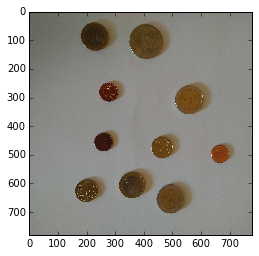

In [83]:
Path = './images/'
image_name = 'coins.jpg'
coins_im = imread(Path.__add__(image_name))
coins_im = img_as_ubyte(coins_im)
coins_im = rescale(coins_im,0.25)

imshow(coins_im)

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

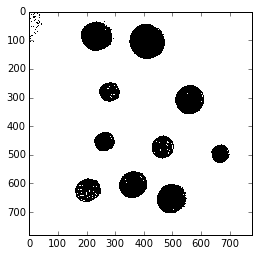

In [24]:
coins_im = rgb2gray(coins_im)

from skimage import filters
thresh = filters.threshold_otsu(coins_im)
binary = coins_im > thresh

imshow(binary)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

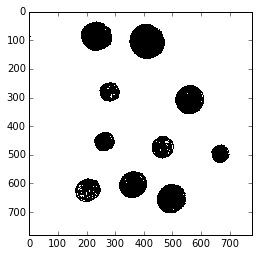

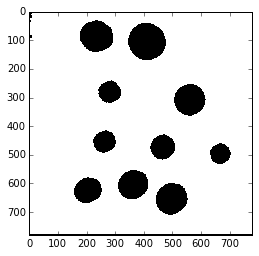

In [72]:
binary_close = binary_closing(binary)
plt.figure()
imshow(binary_close)
from skimage import morphology
binary_close_erode = morphology.binary_erosion(binary_close,selem=disk(4))
plt.figure()
imshow(binary_close_erode)

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

the number of regions is: 12
the radius of region is 56 pxs 
the area of region is 10231 pxs
the radius of region is 65 pxs 
the area of region is 13479 pxs
the radius of region is 38 pxs 
the area of region is 4812 pxs
the radius of region is 54 pxs 
the area of region is 9448 pxs
the radius of region is 38 pxs 
the area of region is 4713 pxs
the radius of region is 42 pxs 
the area of region is 5854 pxs
the radius of region is 35 pxs 
the area of region is 4061 pxs
the radius of region is 51 pxs 
the area of region is 8585 pxs
the radius of region is 46 pxs 
the area of region is 6825 pxs
the radius of region is 55 pxs 
the area of region is 9650 pxs


/home/masters/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:71: UserWarning: Non-standard image type; displaying image with stretched contrast.
  warnings.warn("Non-standard image type; displaying image with "
/home/masters/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


/home/masters/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


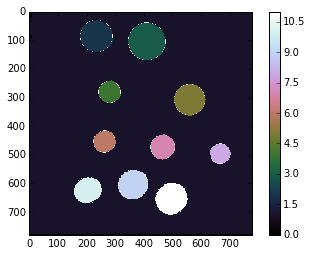

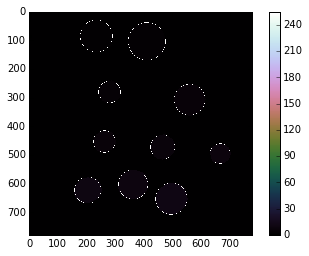

In [73]:
from skimage.draw import circle_perimeter

label_img, num = label(binary_close_erode,return_num=True)
print("the number of regions is: %d"%num )
plt.figure()
imshow(label_img)
props = regionprops(label_img)

for idx in range(num-1):
    if idx == 0:
        continue
    radius = (props[idx].equivalent_diameter)/2.
    if radius > 30:
        area = props[idx].convex_area
        print("the radius of region is %d pxs " %radius)
        print("the area of region is %d pxs" %area)
        circle_centroid = props[idx].centroid
        circle_coord = circle_perimeter(int(circle_centroid[0]),int(circle_centroid[1]),int(radius))
        label_img[circle_coord[0],circle_coord[1]] = 255
    
plt.figure()
imshow(label_img)


## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

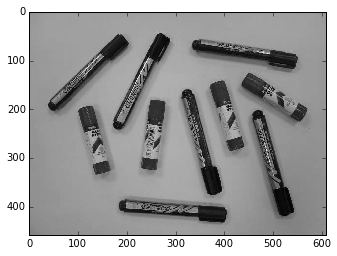

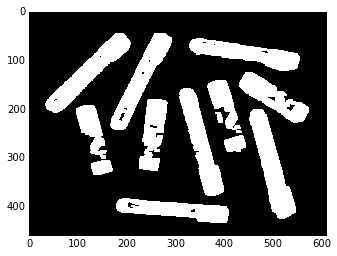

In [97]:
image_name = 'objets4.jpg'
objects_im = imread(Path.__add__(image_name))
objects_im = img_as_ubyte(objects_im)
objects_im  =rgb2gray(objects_im)

plt.figure()
imshow(objects_im)

thresh1 = threshold_otsu(objects_im)
binary1 = objects_im < thresh1

binary1_close = binary_dilation(binary1, selem = rectangle(4,10))
plt.figure()
imshow(binary1_close)
